## 实验：Huggingface Transformer & Diffusion

#### 准备工作

1. 创建虚拟环境：

```
conda create -n huggingface
conda activate huggingface
conda install python=3.11 notebook ipywidgets
```

2. 设置 Pip 软件源，加快下载速度：

```
pip config set global.index-url https://mirrors.bfsu.edu.cn/pypi/web/simple
```

2. 根据硬件选择合适的 PyTorch 版本（二选一）：

- 选项1：CPU 版 PyTorch

```
pip3 install torch torchvision
```

- 选项2：GPU 版 PyTorch

```
pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu118
```

3. 安装 Huggingface 相关软件库：

```
pip install diffusers["torch"] transformers huggingface_hub
```

#### 开始实验！

情感分析：

In [2]:
from transformers import pipeline
pipe = pipeline(task = "text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002ABFE1831D0>, 'Connection to huggingface.co timed out. (connect timeout=10)'))"), '(Request ID: 9d7bfe08-c473-450b-982b-38ba5a503982)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json


In [3]:
pipe("Professor Qiu is very strict.")

[{'label': 'NEGATIVE', 'score': 0.857175886631012}]

In [4]:
pipe("There is a new coffee shop on campus.")

[{'label': 'NEGATIVE', 'score': 0.5159117579460144}]

In [5]:
pipe("There is a new coffee shop on campus. The drinks there taste not bad.")

[{'label': 'POSITIVE', 'score': 0.9982901215553284}]

In [6]:
pipe("There is a new coffee shop on campus. I will never go there again.")

[{'label': 'NEGATIVE', 'score': 0.9703741669654846}]

填词：

In [7]:
fill_masker = pipeline(task = "fill-mask", model = "ethanyt/guwenbert-base")

'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /ethanyt/guwenbert-base/resolve/main/config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002AB903F2A50>, 'Connection to huggingface.co timed out. (connect timeout=10)'))"), '(Request ID: b4690c66-eaae-4703-aa92-e3e9258b1099)')' thrown while requesting HEAD https://huggingface.co/ethanyt/guwenbert-base/resolve/main/config.json
Some weights of the model checkpoint at ethanyt/guwenbert-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to

In [8]:
output = fill_masker("帘外雨潺潺，春意阑珊。罗[MASK]不耐五更寒。")
list(map(lambda x : (x["token_str"], x["score"]), output))

[('衾', 0.20730502903461456),
 ('[SEP]', 0.14002501964569092),
 ('，', 0.12937259674072266),
 ('枕', 0.04262249544262886),
 ('衣', 0.03205789625644684)]

文生图（CPU 版，可能会非常慢）：

In [3]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
)

text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


第一次运行时代码会下载模型文件，如果出现连接问题，可以用如下命令手动下载（该命令会下载所有版本的模型文件，非常大，如果不需要完整版可以去往 https://aliendao.cn/models/runwayml/stable-diffusion-v1-5 手动下载）：

```
python model_download.py --repo_id runwayml/stable-diffusion-v1-5 --mirror
```

然后加载本地模型文件：

```python
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "./dataroot/models/runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
)
```

In [5]:
prompt = "A blue apple"
pipe.enable_attention_slicing()
image = pipe(prompt, num_inference_steps=10).images[0]

  0%|          | 0/10 [00:00<?, ?it/s]

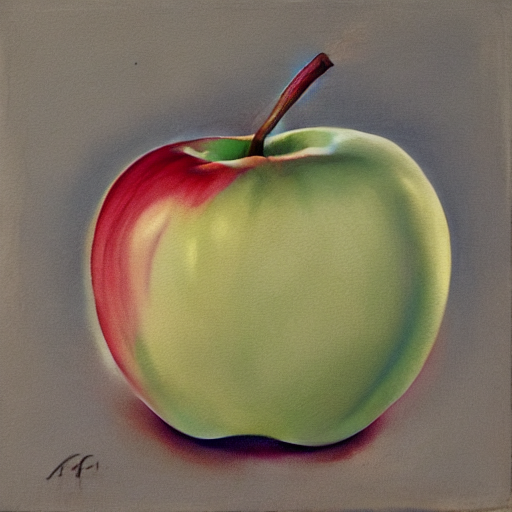

In [3]:
image

GPU 版：

In [1]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe.to("cuda")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\xinby\.conda\envs\win_DL_Q\Lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xinby\.conda\envs\win_DL_Q\Lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "c:\Users\xinby\.conda\envs\win_DL_Q\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\xinby\.conda\envs\win_DL_Q\Lib\site-packages\urllib3\connectionpool.py", line 714, in urlopen
    httplib_response = self._make_request(
                       ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xinby\.conda\envs\win_DL_Q\Lib\site-packages\urllib3\connectionpool.py", line 403, in _make_request
    self._v

In [20]:
prompt = "Piano by the sea"
pipe.enable_attention_slicing()
image = pipe(prompt, num_inference_steps=50).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

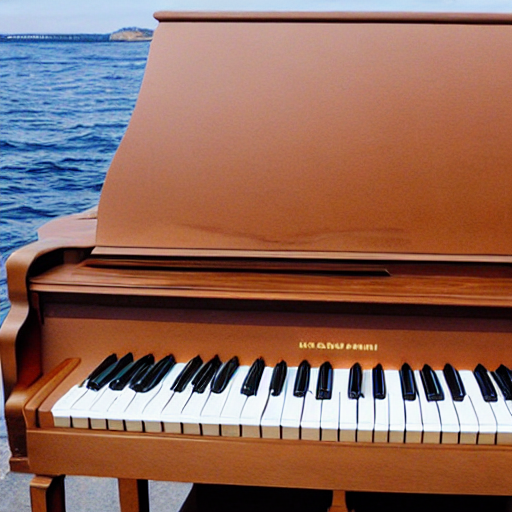

In [21]:
image

控制随机数种子：

  0%|          | 0/50 [00:00<?, ?it/s]

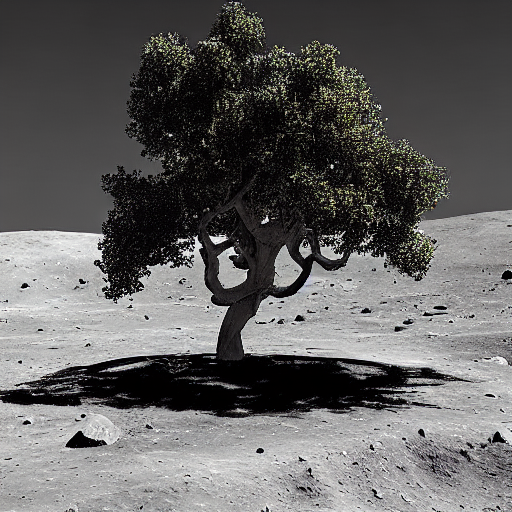

In [7]:
gen = torch.Generator(device="cuda").manual_seed(123)
image = pipe(prompt, generator=gen, num_inference_steps=50).images[0]
image